In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [36]:
df = pd.read_csv("./datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [38]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


### Normalize

In [40]:
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(df), columns=df.columns, index = df.index)

In [41]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.054031,0.966016,0.237411,0.086778
Alaska,0.036872,0.969739,0.176987,0.164081
Arizona,0.026439,0.959624,0.261122,0.101185
Arkansas,0.044528,0.961392,0.252998,0.098669
California,0.030657,0.940134,0.309972,0.138295


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,0.040677,0.015018,0.012626,0.027485,0.039406,0.049811,0.079346
Assault,50.0,0.881704,0.101645,0.473419,0.850453,0.907323,0.952031,0.989371
UrbanPop,50.0,0.409630,0.166944,0.132112,0.279234,0.395010,0.508929,0.854213
Rape,50.0,0.119341,0.035642,0.042620,0.092741,0.117441,0.139552,0.207893


In [43]:
data.shape

(50, 4)

### 1. KMeans Clustering
***

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Finding optimal clusters using Elbow diagram
kpoints = range(2,10)
def draw_elbow(elbow_data):
    inertias = []
    for k in kpoints:
        inertias.append(KMeans(n_clusters=k, init = "k-means++", random_state=42).fit(elbow_data).inertia_)
    plt.figure(figsize = (15, 6))
    plt.plot(kpoints, inertias, "-o")
    plt.title("Number of Clusters vs Distance")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distance")
    plt.show()

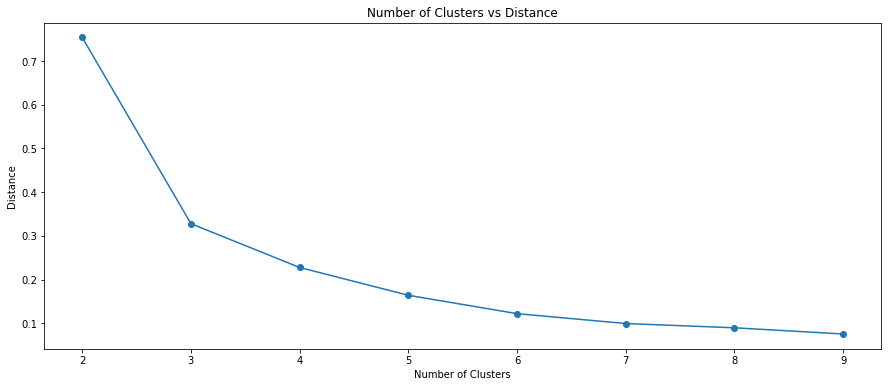

In [46]:
draw_elbow(data)

In [47]:
# Finding optimal clusters using The Silhouette Method (when elbow diagram is not clear)
# The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
# The Silhouette Score reaches its global maximum at the optimal k
from sklearn.metrics import silhouette_score
def draw_sil(sil_data):
    sil_scores = []
    for k in kpoints:
        sil_scores.append(silhouette_score(data, KMeans(n_clusters=k, random_state=42, init = "k-means++").fit(sil_data).labels_ , metric = "euclidean"))
    plt.figure(figsize=(15,6))
    plt.plot(kpoints, sil_scores, "-o")
    plt.title("Clusters vs Silhouette Scores")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score") 
    plt.show()

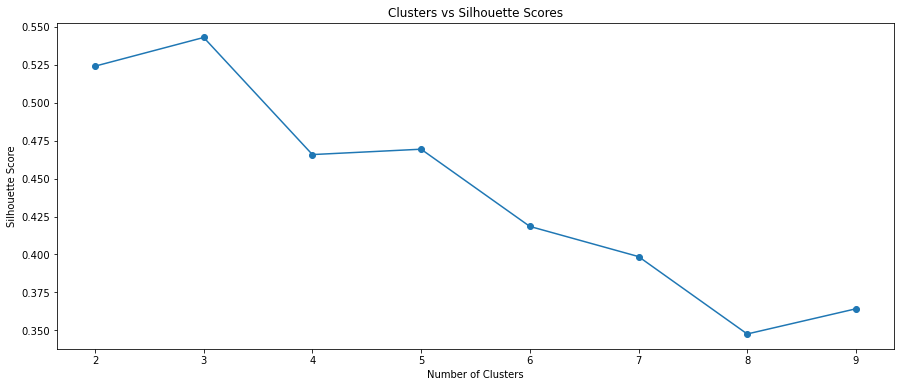

In [48]:
draw_sil(data)

Optimal k value is 3

In [49]:
# Model 
model_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
model_kmeans.fit(data)
kmean_clusters = model_kmeans.labels_

In [50]:
output = data.copy()
output["kmeans-cluster"] = kmean_clusters
output.head(3)

,Murder,Assault,UrbanPop,Rape,kmeans-cluster
Alabama,0.054031,0.966016,0.237411,0.086778,1
Alaska,0.036872,0.969739,0.176987,0.164081,1
Arizona,0.026439,0.959624,0.261122,0.101185,1


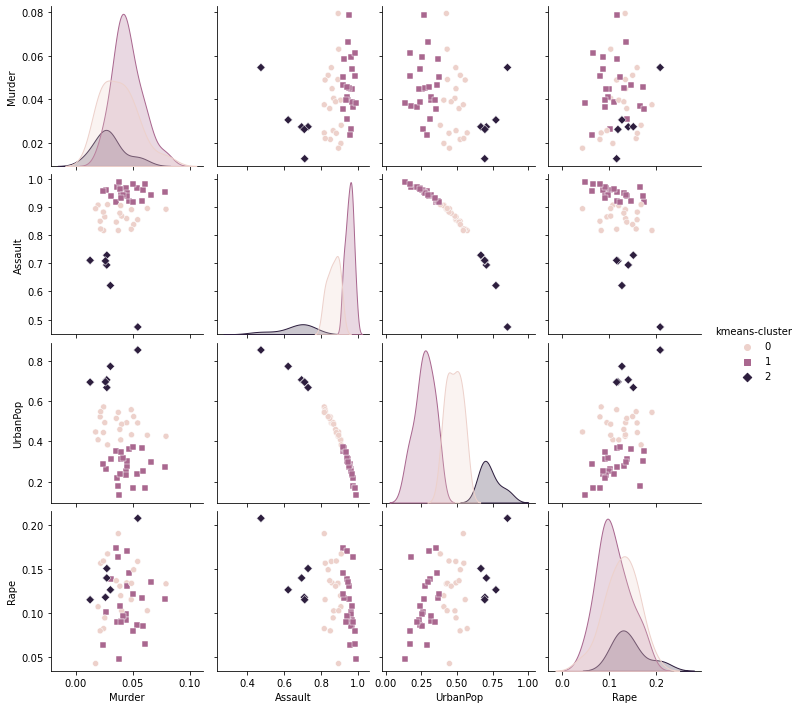

In [51]:
sns.pairplot(output, hue = "kmeans-cluster", markers = ["o", "s", "D"])

### 2. Agglomerative Clustering
***

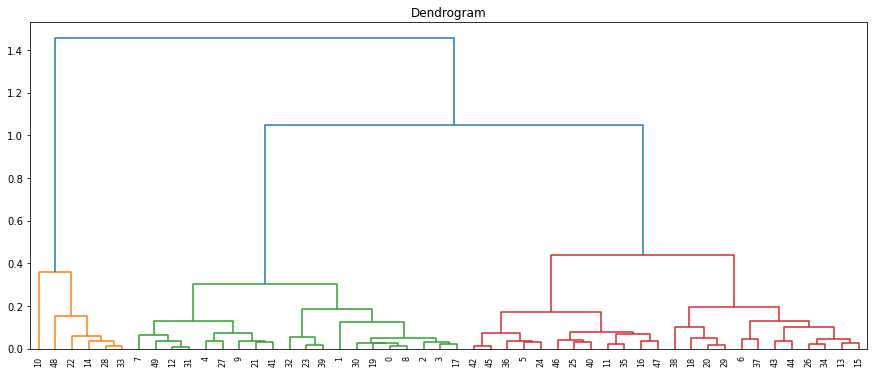

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (15, 6))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method = "ward"))

Number of clusters = 3

In [53]:
from sklearn.cluster import AgglomerativeClustering
model_ag = AgglomerativeClustering(n_clusters= 3, affinity= "euclidean", linkage = "ward").fit(data)
ag_clusters = model_ag.labels_

In [54]:
output["agg-cluster"] = ag_clusters
output.head(3)

,Murder,Assault,UrbanPop,Rape,kmeans-cluster,agg-cluster
Alabama,0.054031,0.966016,0.237411,0.086778,1,2
Alaska,0.036872,0.969739,0.176987,0.164081,1,2
Arizona,0.026439,0.959624,0.261122,0.101185,1,2


### 3. PCA
***

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns, index = df.index)

In [56]:
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

In [58]:
print(f'Number of Principal Components to explain 95% variance = {pca.n_components_}')

Number of Principal Components to explain 95% variance = 3


### 4. Explained Variance
***

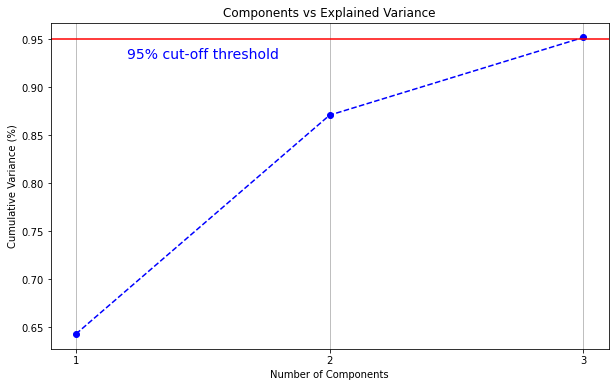

In [59]:
plt.figure(figsize = (10, 6))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "o", linestyle = "--", color = "b")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'r', linestyle = "-")
plt.text(1.2, 0.93, "95% cut-off threshold", color = 'b', fontsize = 14)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()

### 5. KMeans with Principal Components
***

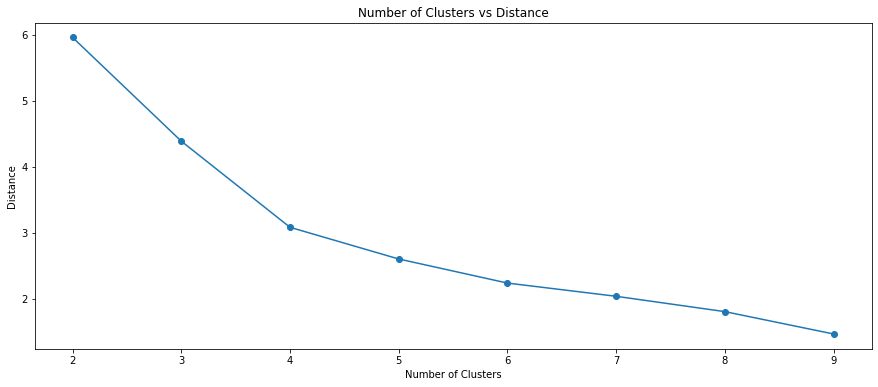

In [60]:
draw_elbow(data_pca)

k = 4

In [61]:
# Model 
model_kmeans_pca = KMeans(n_clusters=4, init = "k-means++", random_state=42)
model_kmeans_pca.fit(data_pca)
kmean_clusters_pca = model_kmeans_pca.labels_

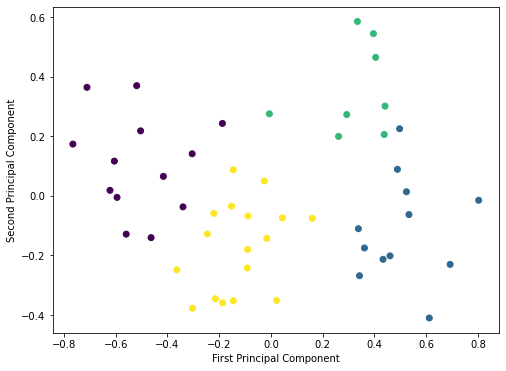

In [62]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = kmean_clusters_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [63]:
output["pca-kmeans-cluster"] = kmean_clusters_pca
output.head(3)

,Murder,Assault,UrbanPop,Rape,kmeans-cluster,agg-cluster,pca-kmeans-cluster
Alabama,0.054031,0.966016,0.237411,0.086778,1,2,2
Alaska,0.036872,0.969739,0.176987,0.164081,1,2,1
Arizona,0.026439,0.959624,0.261122,0.101185,1,2,1


### 6. Agglomerative Clustering with PCA
***

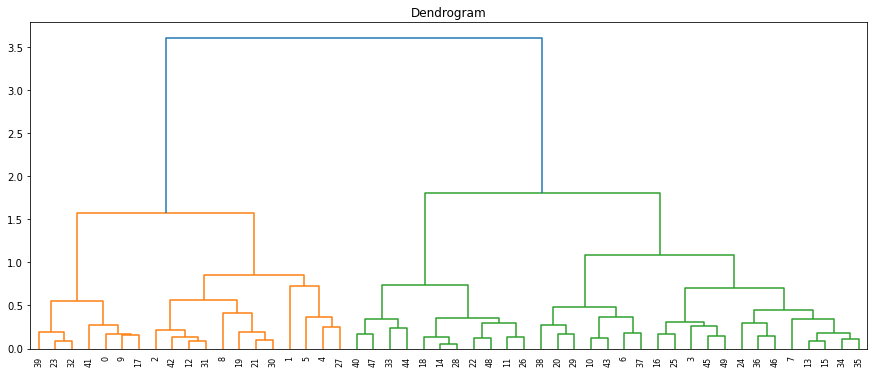

In [64]:
plt.figure(figsize = (15, 6))
plt.title("Dendrogram")
dend = dendrogram(linkage(data_pca, method = "ward"))

number of components = 4

In [65]:
model_ag_pca = AgglomerativeClustering(n_clusters= 4, affinity= "euclidean", linkage = "ward").fit(data_pca)
ag_clusters_pca = model_ag_pca.labels_

In [66]:
output["pca-agg-cluster"] = ag_clusters_pca
output.head(3)

,Murder,Assault,UrbanPop,Rape,kmeans-cluster,agg-cluster,pca-kmeans-cluster,pca-agg-cluster
Alabama,0.054031,0.966016,0.237411,0.086778,1,2,2,3
Alaska,0.036872,0.969739,0.176987,0.164081,1,2,1,1
Arizona,0.026439,0.959624,0.261122,0.101185,1,2,1,1


## Result
***

In [67]:
result = output.reset_index().groupby("pca-agg-cluster")["index"].apply(list)

In [68]:
for x in result:
    print(x)

['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'Montana', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']
['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas']
['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']
['Alabama', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']
